AndrawNg 机器学习 week3 作业

逻辑回归 LogisticRegression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('ex2data1.txt',header = None,names = ['exam1','exam2','admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


原始散点图

Text(0, 0.5, 'exam2 score')

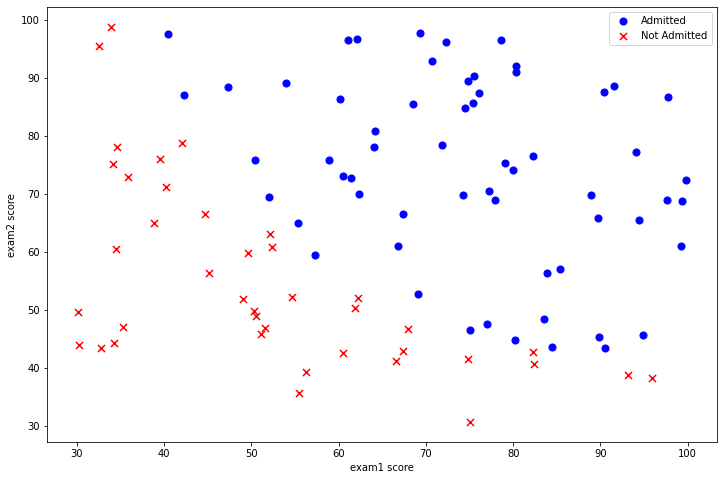

In [3]:
positive = data[data.admitted==1]
negative = data[data.admitted==0]

plt.subplots(figsize = (12,8))
plt.scatter(positive['exam1'],positive['exam2'],s = 50,color = 'blue',marker = 'o',label = 'Admitted')
plt.scatter(negative['exam1'],negative['exam2'],s = 50,color = 'red',marker = 'x',label = 'Not Admitted')
plt.legend()
plt.xlabel('exam1 score')
plt.ylabel('exam2 score')


方法1：梯度下降法

In [4]:
#定义sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
#定义cost function代价函数
def computecost(theta,X,y):
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second = np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    return (1/len(y))*np.sum(first-second)

In [6]:
#挑选training data和testing data
from sklearn.model_selection import train_test_split
X = data[['exam1','exam2']]
y = data[['admitted']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state =10)
X_train.insert(0,'ones',1)
X_test.insert(0,'ones',1)

In [ ]:
#梯度下降
theta = np.matrix(np.array([0,0,0]))
X_train = np.matrix(X_train)
y_train = np.matrix(y_train)
#computecost(theta,X_train,y_train)

def gradientDescent(theta,X,y,alpha,iter):
    m = len(y)
    cost = np.zeros(iter)
    temp = np.matrix(np.zeros(theta.shape))

    for i in range(iter):
        y_predicted = sigmoid(X*theta.T)
        temp[0,0] = theta[0,0]-alpha*(1/m)*sum(y_predicted-y)
        temp[0,1] = theta[0,1]-alpha*(1/m)*sum(np.multiply(X[:,1],(y_predicted-y)))
        temp[0,2] = theta[0,2]-alpha*(1/m)*sum(np.multiply(X[:,2],(y_predicted-y)))
        theta = temp
        cost[i] = computecost(theta,X_train,y_train)
        print(f"theta0 is:{theta[0,0]}")
        print(f"theta1 is:{theta[0,1]}")
        print(f"theta2 is:{theta[0,2]}")
        print(f"cost is:{cost[i]}")
    return theta,cost

iter = 200000
alpha = 0.001
theta,cost = gradientDescent(theta,X_train,y_train,alpha,iter) 




In [8]:
theta1 = theta
theta1
theta[:,0]

matrix([[-7.41456955]])

逻辑回归可视化

In [9]:
x1 = np.matrix(X[['exam1']])
x2 = np.matrix(np.zeros(x1.shape))
for i in range(len(x1)):
    x2[[i]] = -(theta1[:,1]/theta1[:,2])*x1[[i]]-theta1[:,0]/theta1[:,2]

Text(0, 0.5, 'exam2 score')

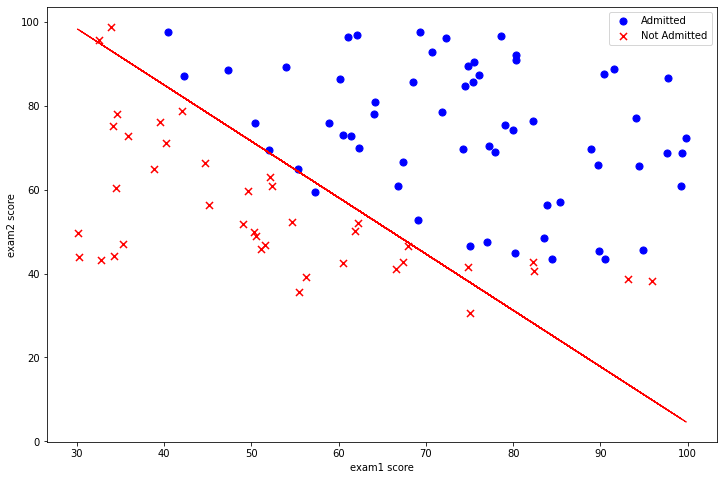

In [10]:
plt.subplots(figsize = (12,8))
plt.scatter(positive['exam1'],positive['exam2'],s = 50,color = 'blue',marker = 'o',label = 'Admitted')
plt.scatter(negative['exam1'],negative['exam2'],s = 50,color = 'red',marker = 'x',label = 'Not Admitted')
plt.plot(x1,x2,'r',linewidth = 1)
plt.legend()
plt.xlabel('exam1 score')
plt.ylabel('exam2 score')


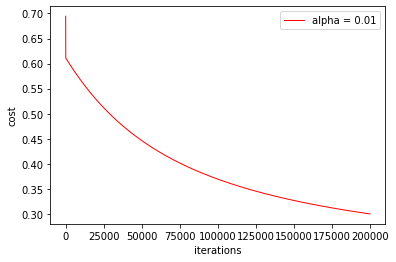

In [11]:
plt.plot(cost,'r',linewidth = 1,label = 'alpha = 0.01')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.legend()

用工具库计算theta的值（不会）

In [ ]:
# import scipy.optimize as opt
# XX = data[['exam1','exam2']]
# yy = data[['admitted']]
# XX.insert(0,'ones',1)
# XX = np.matrix(XX)
# yy = np.matrix(yy)
# XX = np.squeeze(np.asarray(XX))
# yy = np.squeeze(np.asarray(yy))
# result = opt.fmin_tnc(func = computecost,x0 = theta,fprime=gradientDescent,args = (X_train,y_train))

方法二：sickit learn

In [15]:
from sklearn import linear_model

model = linear_model.LogisticRegression()
model.fit(X_train,y_train)

print(model.predict(X_test))
print(model.score(X_test,y_test))

[1 0 1 1 1 1 1 0 0 1]
0.8


D:\python\anzhuang\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\python\anzhuang\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\python\anzhuang\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
D:\python\anzhuang\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
